In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcbWFubnlcT25lRHJpdmVcRG9jdW1lbnRzXEdpdEh1YlxRVE0zNTBGaW5hbFByb2plY3RcdGVzdA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\manny\AppData\Local\Temp\ipykernel_12344\900452099.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1670375372.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1670375370.0, "C:\\Users\\manny\\AppData\\Local\\Programs\\Python\\Python

In [2]:
#| echo: true
import wbdata
import pandas as pd
import sqlite3

# 1. Set indicators
indicators = {
    'SP.DYN.LE00.IN': 'life_expectancy',
    'SH.DYN.MORT': 'under5_mortality_rate',
    'SP.ADO.TFRT': 'adolescent_fertility_rate'
}

# 2. Fetch data (NO date filter)
df = wbdata.get_dataframe(indicators)

# 3. Reset index
df = df.reset_index()

# 4. Drop rows with missing values
df = df.dropna()

# 5. Load into SQLite in-memory database
conn = sqlite3.connect(':memory:')
df.to_sql('population_data', conn, index=False, if_exists='replace')

# 6. Create cleaned table
conn.execute("""
CREATE TABLE cleaned_population_data AS
SELECT
    country,
    date,
    life_expectancy,
    under5_mortality_rate,
    adolescent_fertility_rate
FROM
    population_data
WHERE
    life_expectancy IS NOT NULL
    AND under5_mortality_rate IS NOT NULL
    AND adolescent_fertility_rate IS NOT NULL
""")
conn.commit()

# 7. Descriptive stats
stats_query = """
SELECT
    AVG(life_expectancy) AS avg_life_expectancy,
    MIN(life_expectancy) AS min_life_expectancy,
    MAX(life_expectancy) AS max_life_expectancy,
    AVG(under5_mortality_rate) AS avg_under5_mortality,
    MIN(under5_mortality_rate) AS min_under5_mortality,
    MAX(under5_mortality_rate) AS max_under5_mortality,
    AVG(adolescent_fertility_rate) AS avg_adolescent_fertility,
    MIN(adolescent_fertility_rate) AS min_adolescent_fertility,
    MAX(adolescent_fertility_rate) AS max_adolescent_fertility
FROM
    cleaned_population_data
"""
stats_result = pd.read_sql_query(stats_query, conn)
print(stats_result)

# 8. Group by country
grouped_query = """
SELECT
    country,
    AVG(life_expectancy) AS avg_life_expectancy,
    AVG(under5_mortality_rate) AS avg_under5_mortality_rate,
    AVG(adolescent_fertility_rate) AS avg_adolescent_fertility_rate
FROM
    cleaned_population_data
GROUP BY
    country
ORDER BY
    avg_life_expectancy DESC
"""
grouped_result = pd.read_sql_query(grouped_query, conn)
print(grouped_result.head())


# Query the cleaned table into a DataFrame
cleaned_df = pd.read_sql_query("SELECT * FROM cleaned_population_data", conn)

# Now cleaned_df is a normal DataFrame you can manipulate
print(cleaned_df.head())

   avg_life_expectancy  min_life_expectancy  max_life_expectancy  \
0            65.252508               10.989               86.372   

   avg_under5_mortality  min_under5_mortality  max_under5_mortality  \
0             71.114946                   1.4                 767.4   

   avg_adolescent_fertility  min_adolescent_fertility  \
0                 72.515224                     0.512   

   max_adolescent_fertility  
0                   229.604  
                     country  avg_life_expectancy  avg_under5_mortality_rate  \
0                     Monaco            82.924282                   5.166667   
1                    Andorra            82.030308                   7.423077   
2                 San Marino            81.448641                   6.107692   
3                  Euro area            79.545286                   5.312769   
4  Post-demographic dividend            78.542056                   6.698336   

   avg_adolescent_fertility_rate  
0                      14.336

In [3]:
#| tbl-cap-location: top
#| tbl-colwidths: [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]

# Convert 'date' to integer
cleaned_df['date'] = cleaned_df['date'].astype(int)

# Define 7 major regions
regions_of_interest = [
    'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean',
    'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'
]

# Filter to just major regions
region_df = cleaned_df[cleaned_df['country'].isin(regions_of_interest)]

# Preview the filtered data
region_df.head()

,country,date,life_expectancy,under5_mortality_rate,adolescent_fertility_rate
204,East Asia & Pacific,2023,76.659477,14.5,14.565804
205,East Asia & Pacific,2022,76.676784,14.7,14.800343
206,East Asia & Pacific,2021,76.153009,14.9,15.197225
207,East Asia & Pacific,2020,76.543438,14.9,15.878941
208,East Asia & Pacific,2019,76.586262,14.8,17.261394


C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-p

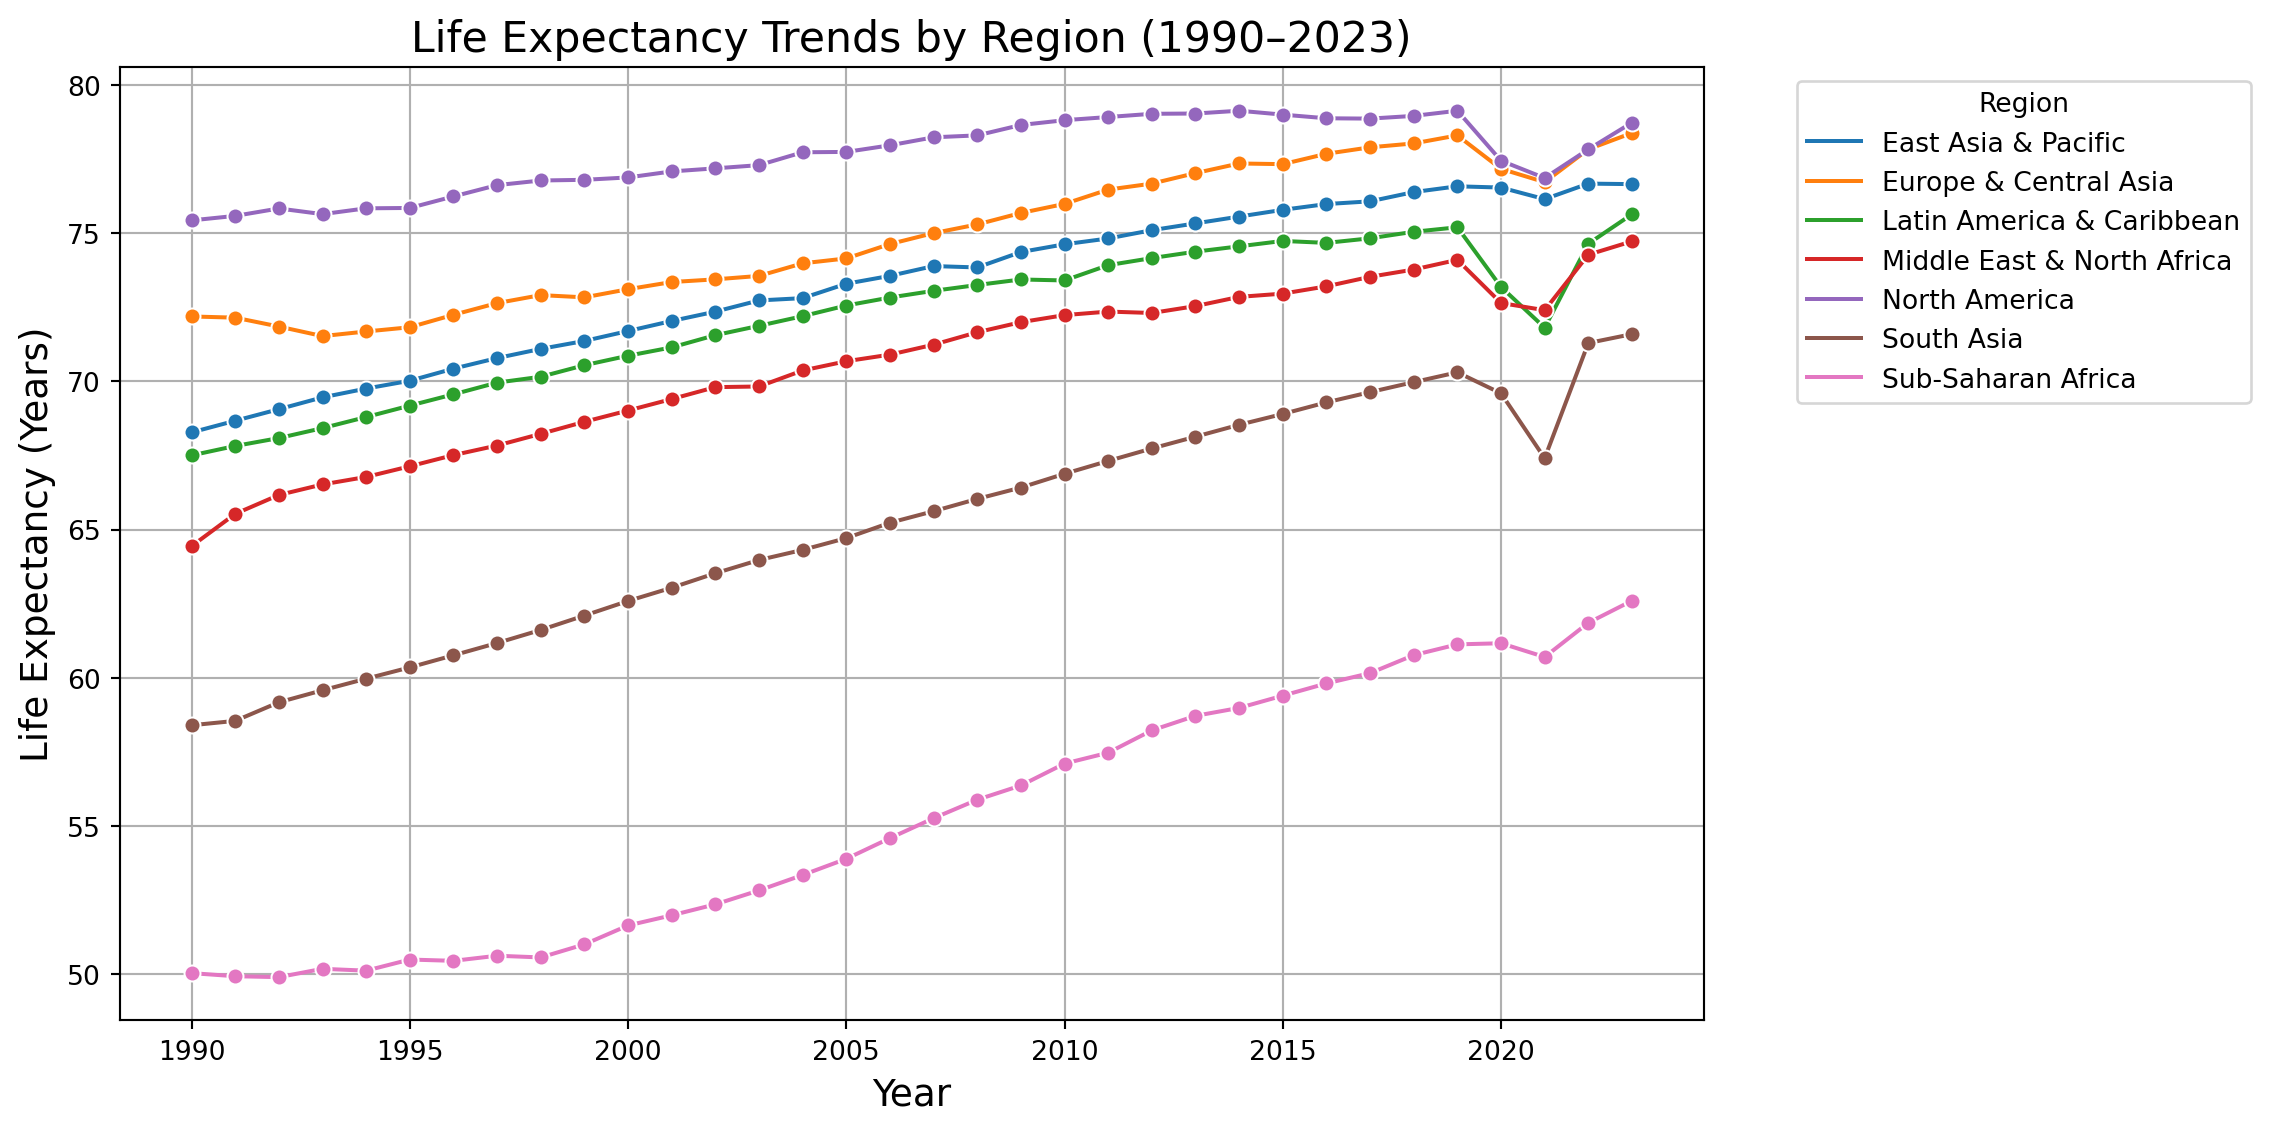

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Life Expectancy over Time for 7 regions
plt.figure(figsize=(12,6))
sns.lineplot(
    data=region_df,
    x='date',
    y='life_expectancy',
    hue='country',
    marker='o'
)

plt.title('Life Expectancy Trends by Region (1990–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-p

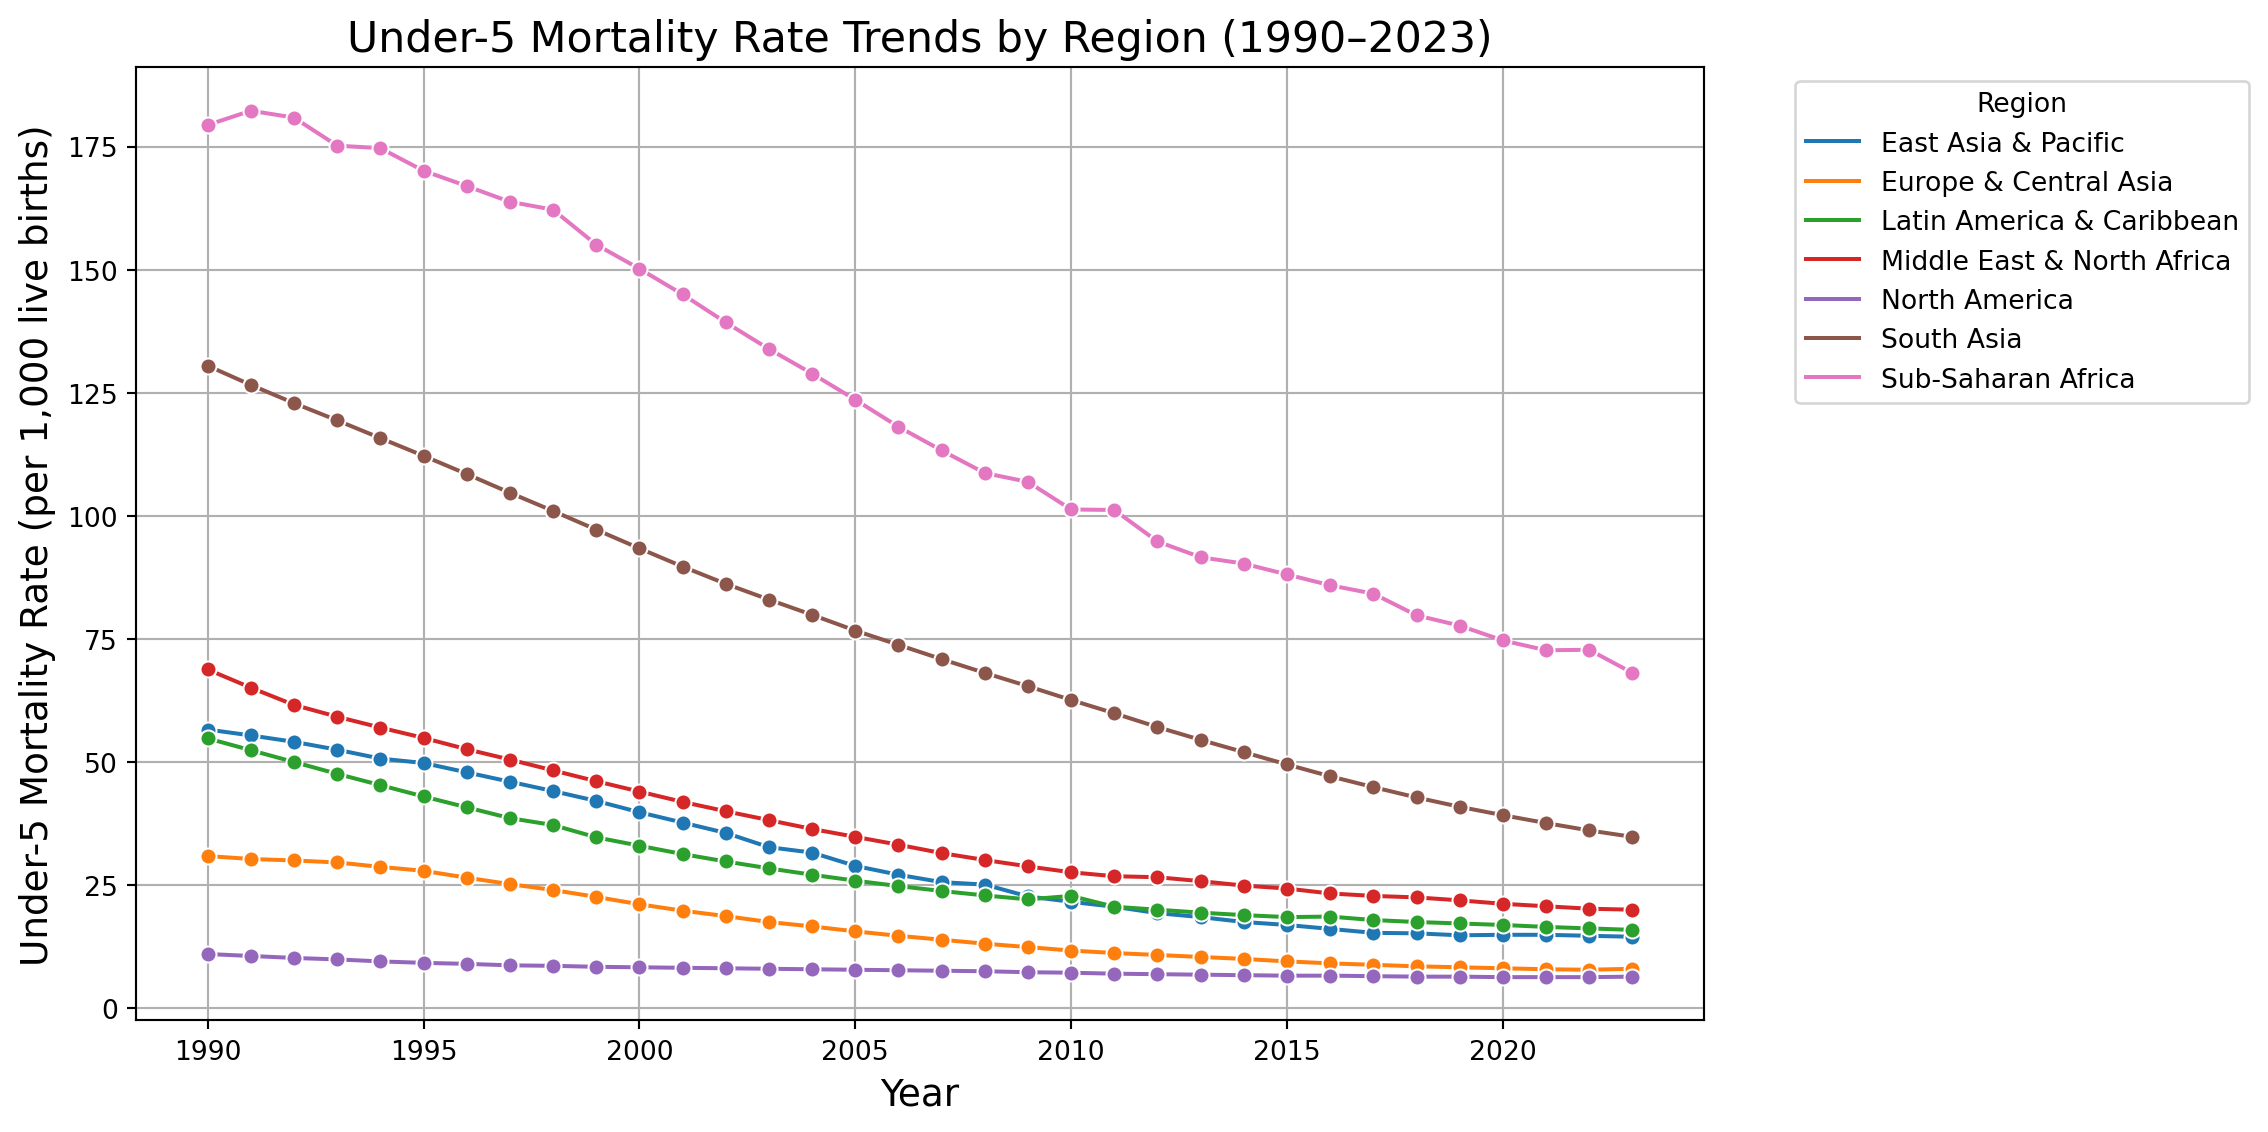

In [5]:
# Plot Under-5 Mortality over Time for 7 regions
plt.figure(figsize=(12,6))
sns.lineplot(
    data=region_df,
    x='date',
    y='under5_mortality_rate',
    hue='country',
    marker='o'
)

plt.title('Under-5 Mortality Rate Trends by Region (1990–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Under-5 Mortality Rate (per 1,000 live births)', fontsize=14)
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manny\AppData\Local\Programs\Python\Python311\Lib\site-p

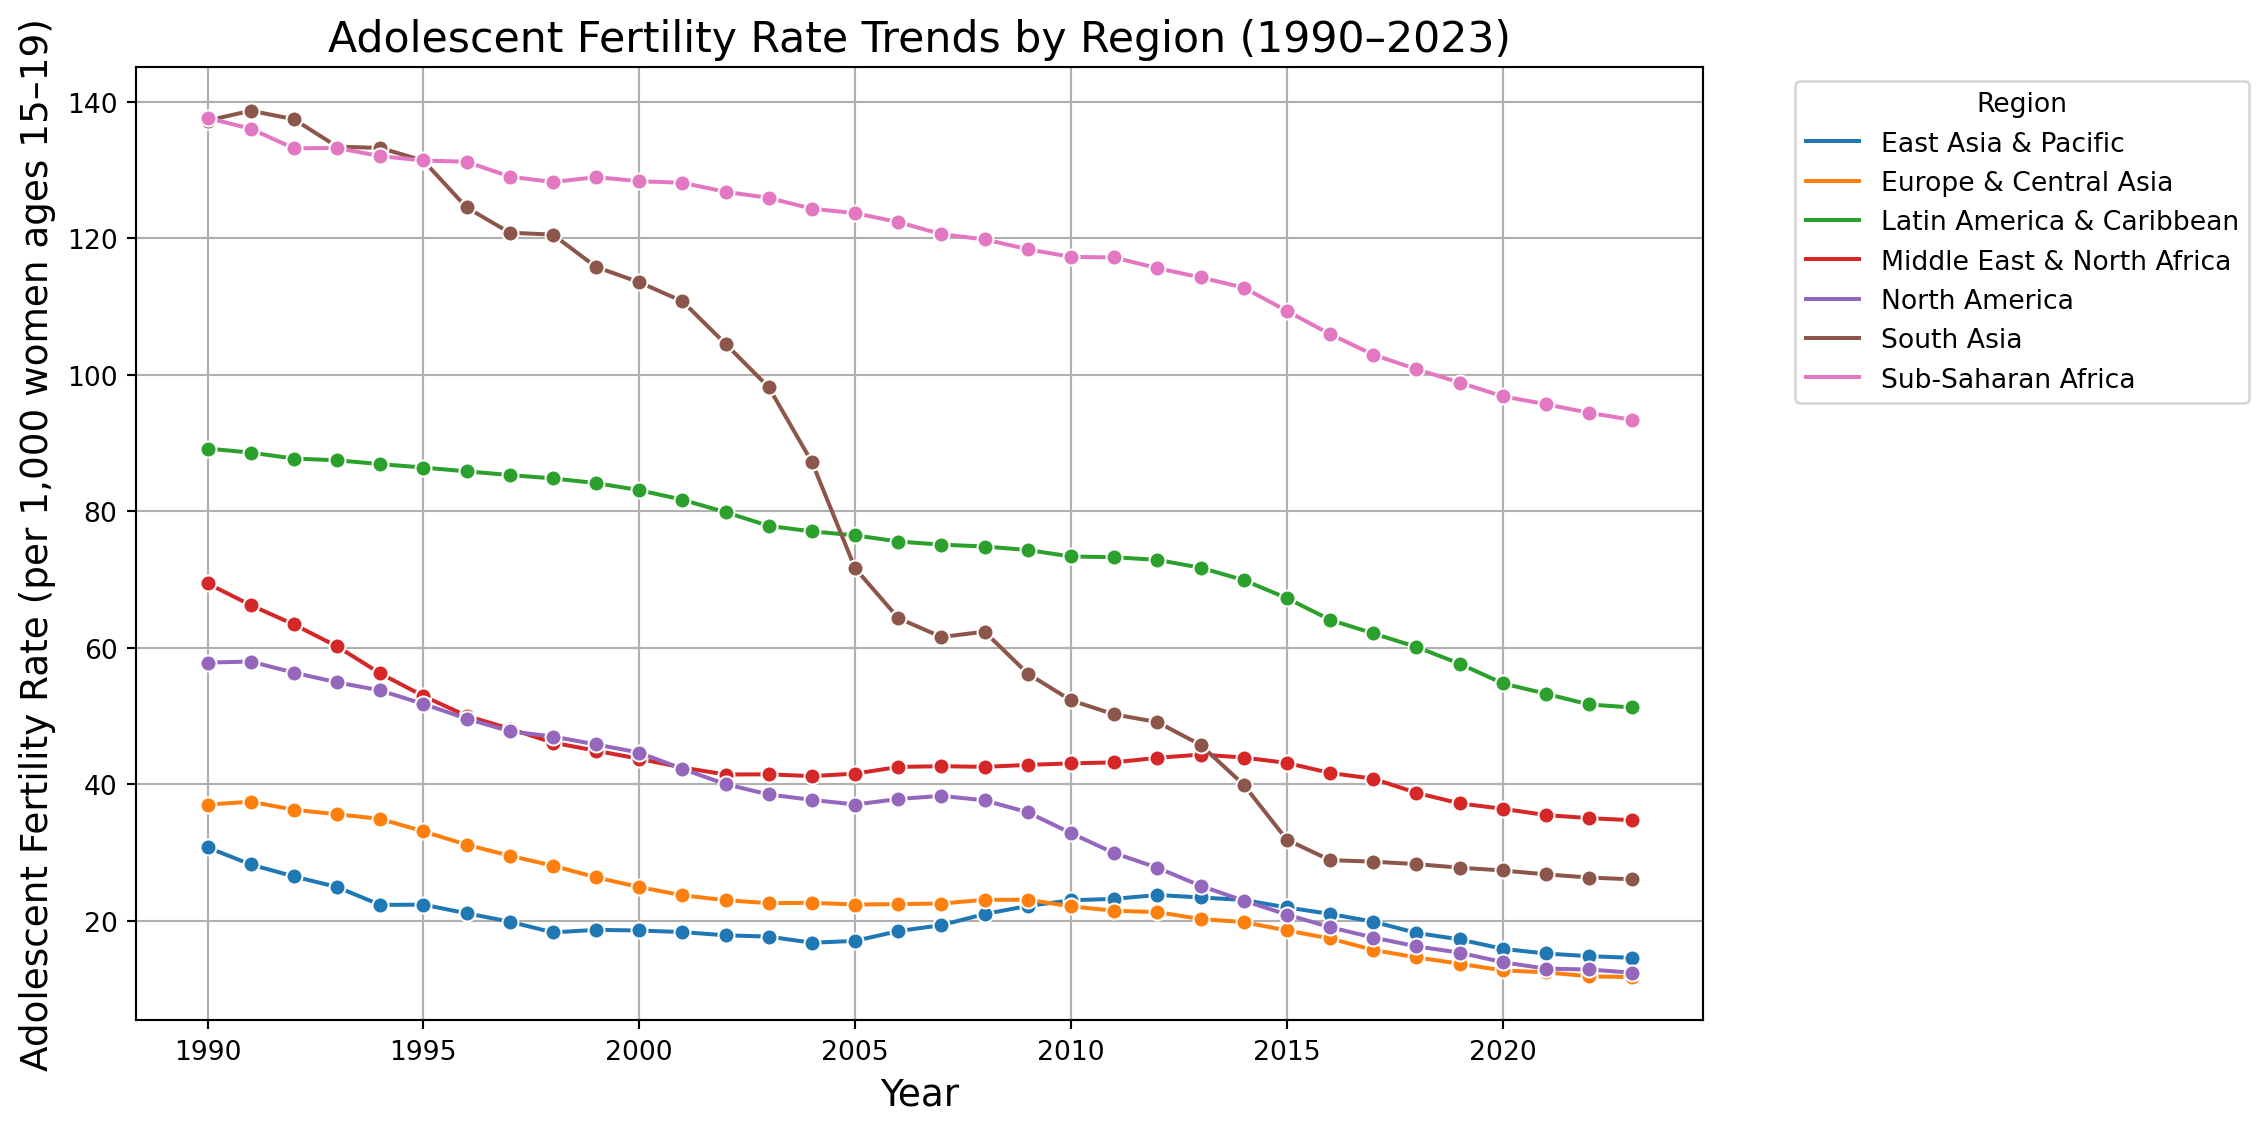

In [6]:
# Plot Adolescent Fertility over Time for 7 regions
plt.figure(figsize=(12,6))
sns.lineplot(
    data=region_df,
    x='date',
    y='adolescent_fertility_rate',
    hue='country',
    marker='o'
)

plt.title('Adolescent Fertility Rate Trends by Region (1990–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Adolescent Fertility Rate (per 1,000 women ages 15–19)', fontsize=14)
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
#| echo: false
#| output: asis

# Filter only for 1990 and 2023
df_1990 = region_df[region_df['date'] == 1990]
df_2023 = region_df[region_df['date'] == 2023]

# Merge 1990 and 2023 data by region
region_change = pd.merge(
    df_1990,
    df_2023,
    on='country',
    suffixes=('_1990', '_2023')
)

# Display nicely for PDF
from IPython.display import display, Latex

display(Latex(r"""
\begin{table}[!htbp]
\centering
\small
\resizebox{\textwidth}{!}{
""" + region_change.head().to_latex(index=False, escape=True) + r"""
}
\end{table}
"""))

<IPython.core.display.Latex object>

In [8]:
#| echo: false
#| output: asis

# Calculate % change for each indicator
region_change['life_expectancy_pct_change'] = (
    (region_change['life_expectancy_2023'] - region_change['life_expectancy_1990'])
    / region_change['life_expectancy_1990']
) * 100

region_change['under5_mortality_pct_change'] = (
    (region_change['under5_mortality_rate_2023'] - region_change['under5_mortality_rate_1990'])
    / region_change['under5_mortality_rate_1990']
) * 100

region_change['adolescent_fertility_pct_change'] = (
    (region_change['adolescent_fertility_rate_2023'] - region_change['adolescent_fertility_rate_1990'])
    / region_change['adolescent_fertility_rate_1990']
) * 100

# View final table
region_change[['country', 'life_expectancy_pct_change', 'under5_mortality_pct_change', 'adolescent_fertility_pct_change']]

# Select final table
final_table = region_change[['country', 'life_expectancy_pct_change', 'under5_mortality_pct_change', 'adolescent_fertility_pct_change']]

# Display nicely for PDF
from IPython.display import display, Latex

display(Latex(r"""
\begin{table}[!htbp]
\centering
\small
\resizebox{\textwidth}{!}{
""" + final_table.to_latex(index=False, escape=True) + r"""
}
\end{table}
"""))

<IPython.core.display.Latex object>

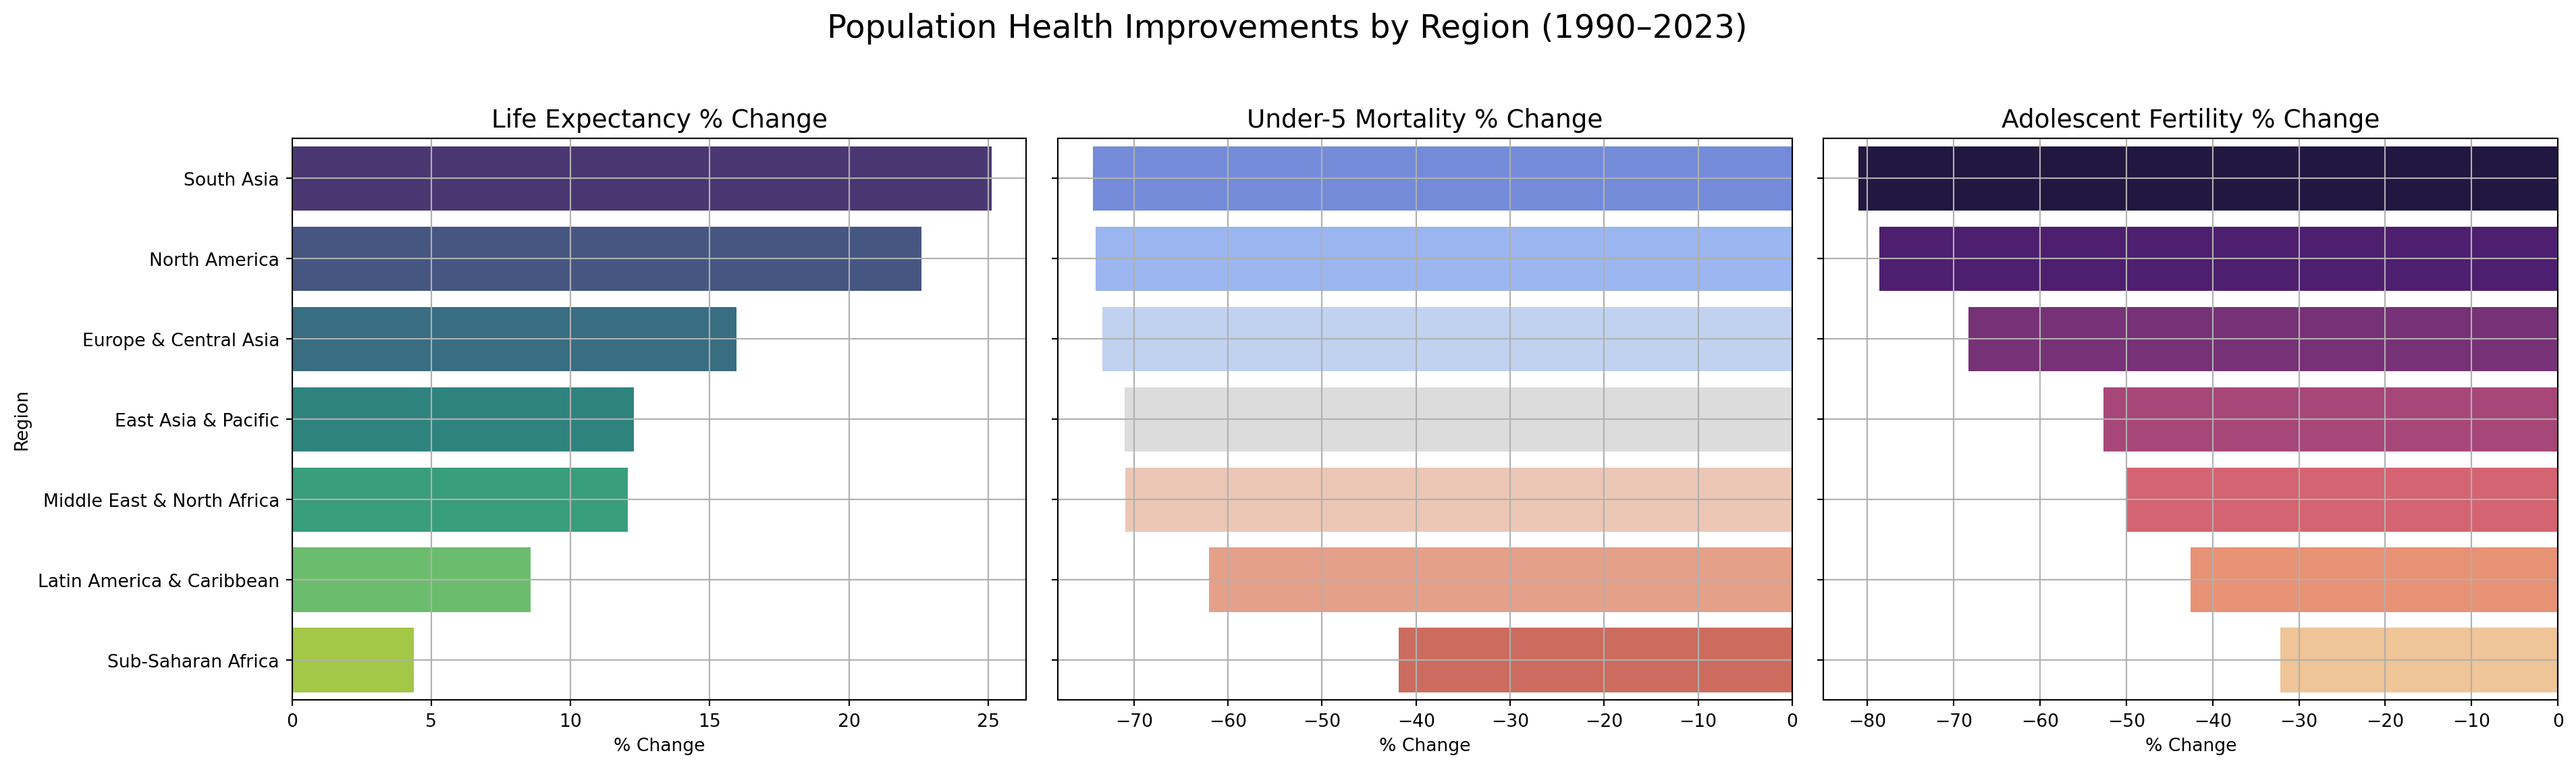

In [9]:
# Create a combined figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)

# Plot 1: Life Expectancy % Change
sns.barplot(
    data=region_change.sort_values('life_expectancy_pct_change', ascending=False),
    x='life_expectancy_pct_change',
    y='country',
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Life Expectancy % Change', fontsize=14)
axes[0].set_xlabel('% Change')
axes[0].set_ylabel('Region')
axes[0].grid(True)

# Plot 2: Under-5 Mortality % Change
sns.barplot(
    data=region_change.sort_values('under5_mortality_pct_change', ascending=True),
    x='under5_mortality_pct_change',
    y='country',
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Under-5 Mortality % Change', fontsize=14)
axes[1].set_xlabel('% Change')
axes[1].set_ylabel('')
axes[1].grid(True)

# Plot 3: Adolescent Fertility % Change
sns.barplot(
    data=region_change.sort_values('adolescent_fertility_pct_change', ascending=True),
    x='adolescent_fertility_pct_change',
    y='country',
    ax=axes[2],
    palette='magma'
)
axes[2].set_title('Adolescent Fertility % Change', fontsize=14)
axes[2].set_xlabel('% Change')
axes[2].set_ylabel('')
axes[2].grid(True)

# Main title
fig.suptitle('Population Health Improvements by Region (1990–2023)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [10]:
# Correlation between life expectancy improvements and other indicators
corr_under5 = region_change[['life_expectancy_pct_change', 'under5_mortality_pct_change']].corr().iloc[0,1]
corr_fertility = region_change[['life_expectancy_pct_change', 'adolescent_fertility_pct_change']].corr().iloc[0,1]

print(f"Correlation between Life Expectancy Change and Under-5 Mortality Change: {corr_under5:.3f}")
print(f"Correlation between Life Expectancy Change and Adolescent Fertility Change: {corr_fertility:.3f}")

Correlation between Life Expectancy Change and Under-5 Mortality Change: -0.364
Correlation between Life Expectancy Change and Adolescent Fertility Change: 0.388


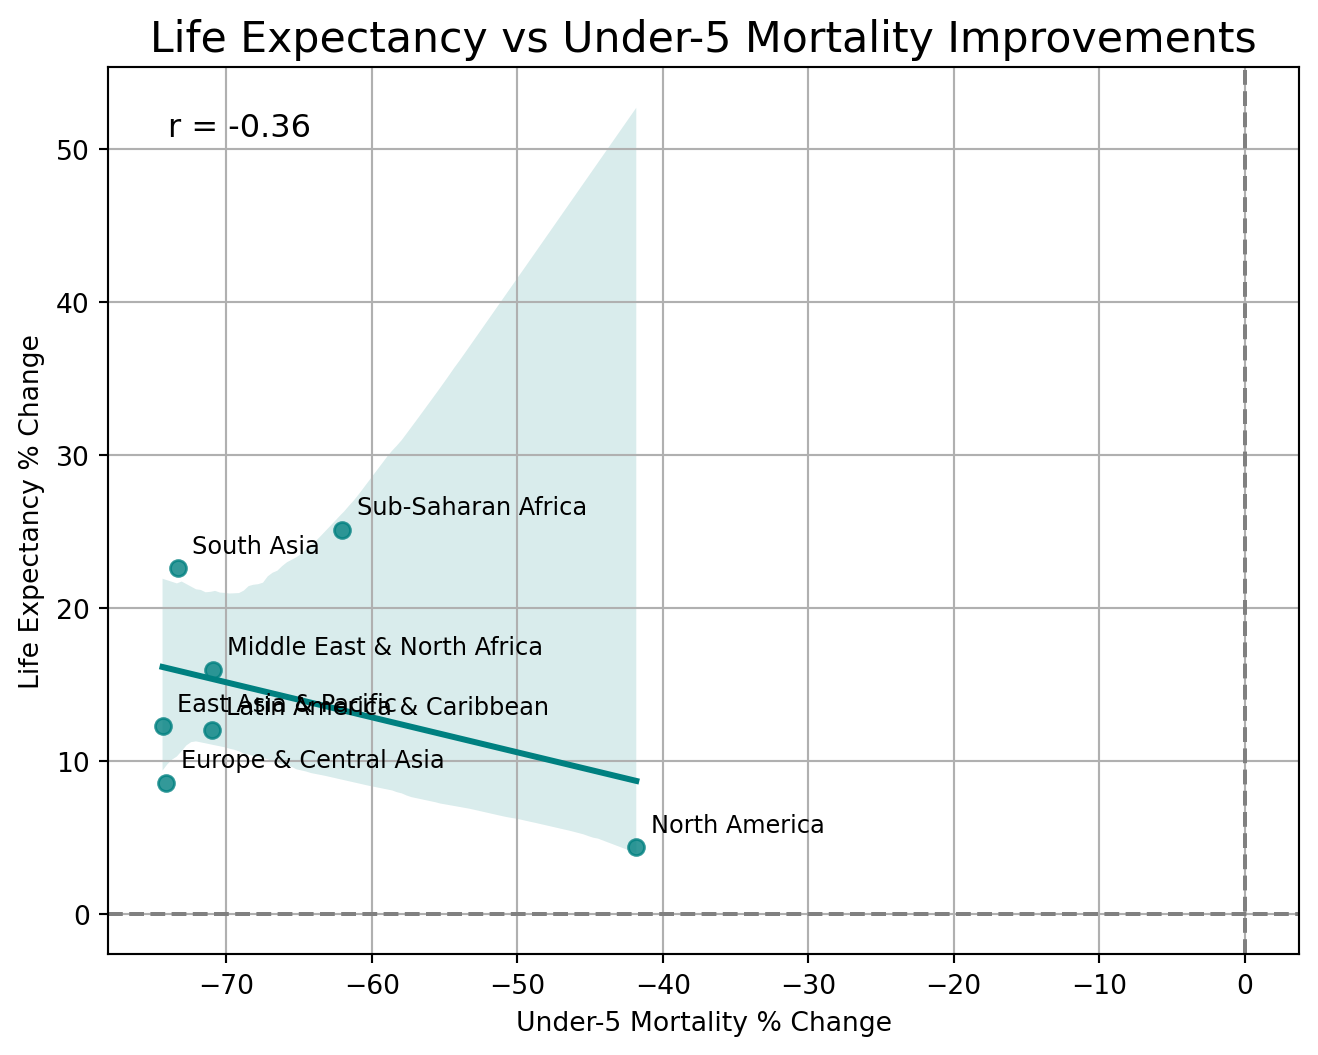

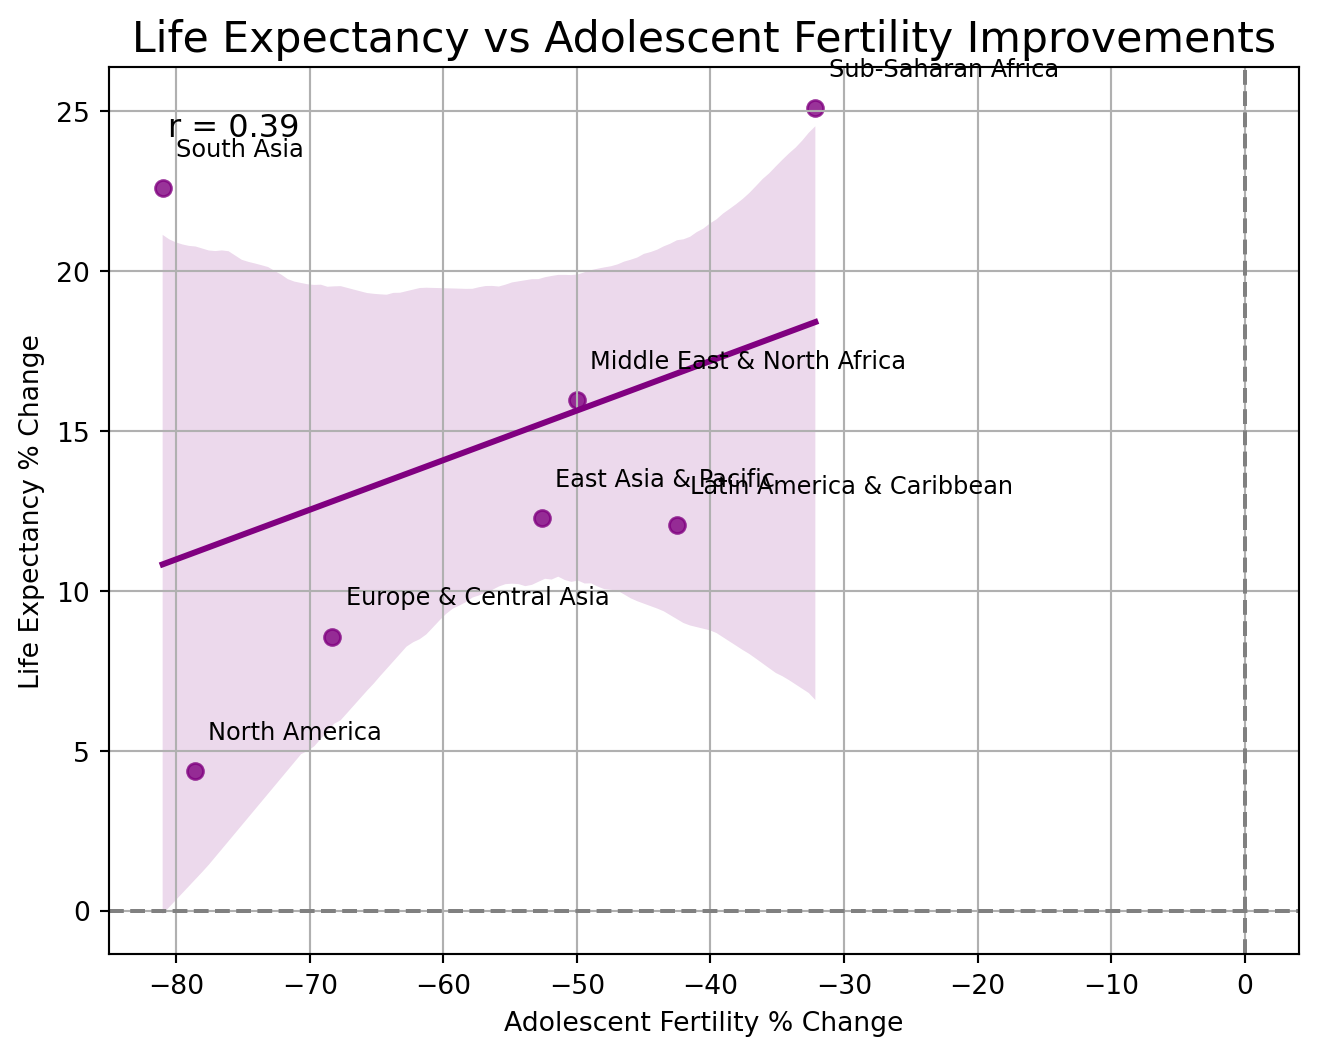

In [11]:
import scipy.stats as stats

# Calculate correlations
corr_under5, _ = stats.pearsonr(region_change['under5_mortality_pct_change'], region_change['life_expectancy_pct_change'])
corr_fertility, _ = stats.pearsonr(region_change['adolescent_fertility_pct_change'], region_change['life_expectancy_pct_change'])

# Scatterplot: Life Expectancy vs Under-5 Mortality Improvements
plt.figure(figsize=(8,6))
sns.regplot(
    data=region_change,
    x='under5_mortality_pct_change',
    y='life_expectancy_pct_change',
    scatter=True,
    color='teal',
    marker='o'
)
for i in range(region_change.shape[0]):
    plt.text(
        region_change['under5_mortality_pct_change'].iloc[i]+1,
        region_change['life_expectancy_pct_change'].iloc[i]+1,
        region_change['country'].iloc[i],
        fontsize=9
    )
plt.title('Life Expectancy vs Under-5 Mortality Improvements', fontsize=16)
plt.xlabel('Under-5 Mortality % Change')
plt.ylabel('Life Expectancy % Change')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
# Add correlation text
plt.text(
    0.05, 0.95, f'r = {corr_under5:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.show()

# Scatterplot: Life Expectancy vs Adolescent Fertility Improvements
plt.figure(figsize=(8,6))
sns.regplot(
    data=region_change,
    x='adolescent_fertility_pct_change',
    y='life_expectancy_pct_change',
    scatter=True,
    color='purple',
    marker='o'
)
for i in range(region_change.shape[0]):
    plt.text(
        region_change['adolescent_fertility_pct_change'].iloc[i]+1,
        region_change['life_expectancy_pct_change'].iloc[i]+1,
        region_change['country'].iloc[i],
        fontsize=9
    )
plt.title('Life Expectancy vs Adolescent Fertility Improvements', fontsize=16)
plt.xlabel('Adolescent Fertility % Change')
plt.ylabel('Life Expectancy % Change')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
# Add correlation text
plt.text(
    0.05, 0.95, f'r = {corr_fertility:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.show()